# Week 3 EDA
### Tasks:
- Code for Data split 
- Code for EDA

### Data Split:
Because the data is structured as panel data, this data must be split ascendingly by date according to a split decided by the team. 

The first portion of data will be used to predict the last 12 months in the data from December 2023 - December 2024.

Cross-validation for time series can be done later after the train/test split is performed. (Link: https://otexts.com/fpp3/tscv.html)

### Notes to this Step:
Though the data is split at this point, it does not imply that it is ready to be modeled yet, EDA must still be performed strictly upon the training data. The data can still be aggregated as well to try and find a more solid way to predict encounters. 

### Approaches to take:
- Aggregated Barplots
- Decomposition Methods
- Aggregated Time Series Plot
- Geographic Heat Maps

In [1]:
# Standard Setup Import
from _Setup import *

### Data Cleaning
The data needs a slight rework with regards to the dates. The following code will create a date tag associated with each observation's month to make graphing easier. 

In [2]:
# Import sector-level data
sector_df = pd.read_csv(sector_data_csv_path)
sector_df.head()

C:\Users\Trevo\AppData\Local\Temp\ipykernel_43444\2013690093.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  sector_df = pd.read_csv(sector_data_csv_path)


,Fiscal Year,Month Grouping,Month (abbv),Component,Land Border Region,Area of Responsibility,AOR (Abbv),Demographic,Citizenship,Title of Authority,Encounter Type,Encounter Count
0,2020,FYTD,OCT,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,FMUA,BRAZIL,Title 8,Inadmissibles,2
1,2020,FYTD,OCT,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,FMUA,OTHER,Title 8,Inadmissibles,29
2,2020,FYTD,OCT,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,BRAZIL,Title 8,Inadmissibles,1
3,2020,FYTD,OCT,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,CANADA,Title 8,Inadmissibles,1031
4,2020,FYTD,OCT,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,"CHINA, PEOPLES REPUBLIC OF",Title 8,Inadmissibles,9


In [3]:
sector_df.replace(to_replace="2025 (FYTD)", value=2025, inplace=True)
sector_df.replace(to_replace='2024', value=2024, inplace=True)
print(sector_df['Fiscal Year'].unique())

[2020 2021 2022 2023 2024 2025]


C:\Users\Trevo\AppData\Local\Temp\ipykernel_43444\3371552.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sector_df.replace(to_replace='2024', value=2024, inplace=True)


In [4]:
# Create a dictionary mapping month abbreviations (uppercase) to month numbers
month_abbr_to_num = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}

# Function to convert Fiscal Year and Month (abbv) to a Year-Date
def convert_to_fiscal_year_date(row):
    month_num = month_abbr_to_num[row['Month (abbv)'].upper()]
    fiscal_year = int(row['Fiscal Year'])  # Convert Fiscal Year to integer
    
    # Adjust fiscal year for months January through September
    if month_num >= 10:  # Jan - Sep belong to the previous calendar year
        fiscal_year -= 1
    
    # Format the fiscal year and month into a date string
    return f"{fiscal_year}-{month_num:02d}-01"

# Apply the function to create a Year-Date column in fytd_df
sector_df['Year-Date'] = sector_df.apply(lambda row: convert_to_fiscal_year_date(row), axis=1)

# Convert the new column to datetime format
sector_df['Year-Date'] = pd.to_datetime(sector_df['Year-Date'], format='%Y-%m-%d')

# Display the dataframe with the new fiscal year-based Year-Date
print(sector_df['Year-Date'].unique())

<DatetimeArray>
['2019-10-01 00:00:00', '2019-11-01 00:00:00', '2019-12-01 00:00:00',
 '2020-01-01 00:00:00', '2020-02-01 00:00:00', '2020-03-01 00:00:00',
 '2020-04-01 00:00:00', '2020-05-01 00:00:00', '2020-06-01 00:00:00',
 '2020-07-01 00:00:00', '2020-08-01 00:00:00', '2020-09-01 00:00:00',
 '2020-10-01 00:00:00', '2020-11-01 00:00:00', '2020-12-01 00:00:00',
 '2021-01-01 00:00:00', '2021-02-01 00:00:00', '2021-03-01 00:00:00',
 '2021-04-01 00:00:00', '2021-05-01 00:00:00', '2021-06-01 00:00:00',
 '2021-07-01 00:00:00', '2021-08-01 00:00:00', '2021-09-01 00:00:00',
 '2021-10-01 00:00:00', '2021-11-01 00:00:00', '2021-12-01 00:00:00',
 '2022-01-01 00:00:00', '2022-02-01 00:00:00', '2022-03-01 00:00:00',
 '2022-04-01 00:00:00', '2022-05-01 00:00:00', '2022-06-01 00:00:00',
 '2022-07-01 00:00:00', '2022-08-01 00:00:00', '2022-09-01 00:00:00',
 '2022-10-01 00:00:00', '2022-11-01 00:00:00', '2022-12-01 00:00:00',
 '2023-01-01 00:00:00', '2023-02-01 00:00:00', '2023-03-01 00:00:00',
 '20

### TODO : Train Test Split
The data will be split at December 2023 for the last month of the Train data. Our goal is to predict January 2024-on. 

In [11]:
train_df = sector_df[sector_df['Year-Date'] < '2024-01-01']
test_df = sector_df[sector_df['Year-Date'] >= '2024-01-01']

train_df.head()

,Fiscal Year,Month Grouping,Month (abbv),Component,Land Border Region,Area of Responsibility,AOR (Abbv),Demographic,Citizenship,Title of Authority,Encounter Type,Encounter Count,Year-Date
0,2020,FYTD,OCT,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,FMUA,BRAZIL,Title 8,Inadmissibles,2,2019-10-01
1,2020,FYTD,OCT,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,FMUA,OTHER,Title 8,Inadmissibles,29,2019-10-01
2,2020,FYTD,OCT,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,BRAZIL,Title 8,Inadmissibles,1,2019-10-01
3,2020,FYTD,OCT,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,CANADA,Title 8,Inadmissibles,1031,2019-10-01
4,2020,FYTD,OCT,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,"CHINA, PEOPLES REPUBLIC OF",Title 8,Inadmissibles,9,2019-10-01


### Resave the Train/Test dataframe to avoid redoing this transformation

In [6]:
train_df.to_csv(sector_data_csv_path_train, index=False)
test_df.to_csv(sector_data_csv_path_test, index=False)

## EDA Portion

<Figure size 1200x600 with 0 Axes>

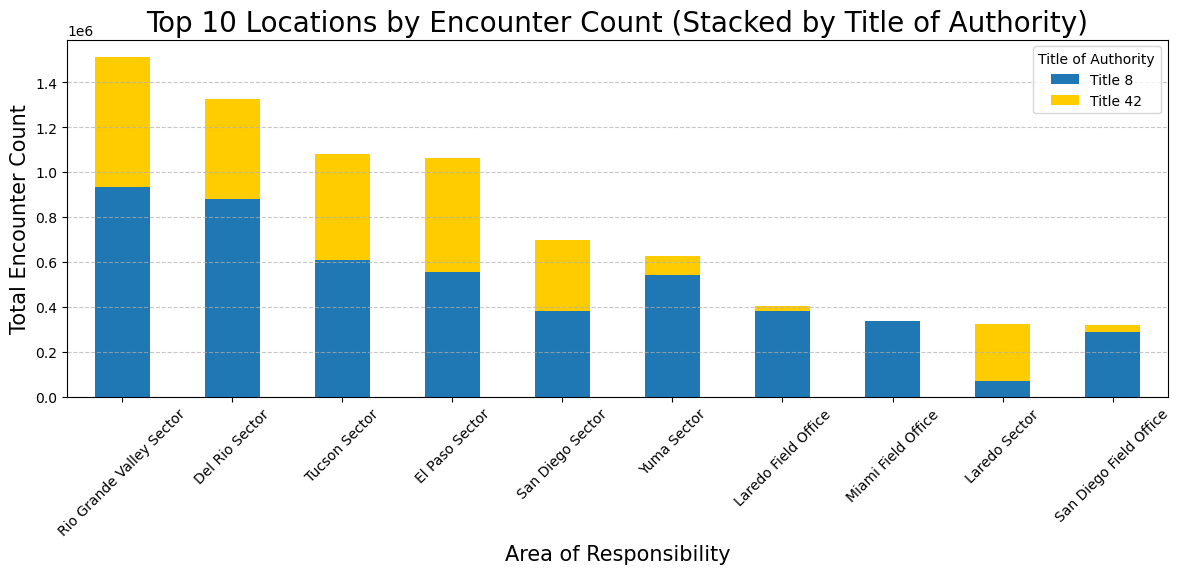

In [31]:
import seaborn as sns

# Aggregate by AOR (Abbv) and Title of Authority, summing Encounter Count
train_agg = train_df.groupby(['Area of Responsibility', 'Title of Authority'])['Encounter Count'].sum().reset_index()

# Get the top 10 locations by highest total Encounter Count
top_10_locations = train_agg.groupby('Area of Responsibility')['Encounter Count'].sum().nlargest(10).index

# Filter the dataset to only include the top 10 locations
filtered_sector_agg = train_agg[train_agg['Area of Responsibility'].isin(top_10_locations)]

# Pivot the dataframe to have 'Title of Authority' as separate columns
pivot_df = filtered_sector_agg.pivot(index='Area of Responsibility', columns='Title of Authority', values='Encounter Count').fillna(0)

# Sort AORs from most to least by total encounter count
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]

# Sort columns (Title of Authority) from most to least within each AOR
pivot_df = pivot_df[pivot_df.sum().sort_values(ascending=False).index]

# Custom color palette with a golden tone
custom_colors = sns.color_palette(["#1f77b4", "#ffcc00", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"])

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
pivot_df.plot(kind='bar', stacked=True, color=custom_colors, figsize=(12, 6))

# Formatting
plt.title('Top 10 Locations by Encounter Count (Stacked by Title of Authority)', size = 20)
plt.xlabel('Area of Responsibility', size = 15)  # Abbreviated area of responsibility
plt.ylabel('Total Encounter Count', size = 15)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='Title of Authority')  # Legend for stack colors
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for readability
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 600x600 with 0 Axes>

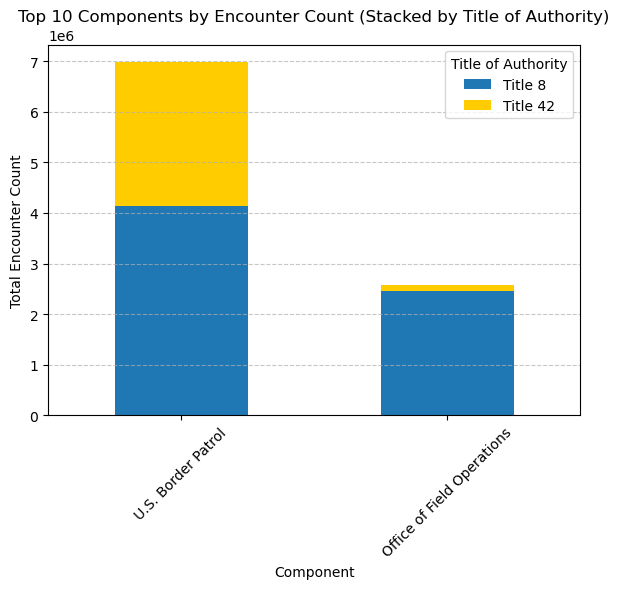

In [9]:
# Aggregate by Component and Title of Authority, summing Encounter Count
sector_agg = train_df.groupby(['Component', 'Title of Authority'])['Encounter Count'].sum().reset_index()

# Get the top 10 Components by highest total Encounter Count
top_10_components = sector_agg.groupby('Component')['Encounter Count'].sum().nlargest(10).index

# Filter the dataset to only include the top 10 Components
filtered_sector_agg = sector_agg[sector_agg['Component'].isin(top_10_components)]

# Pivot the dataframe to have 'Title of Authority' as separate columns
pivot_df = filtered_sector_agg.pivot(index='Component', columns='Title of Authority', values='Encounter Count').fillna(0)

# Sort Components from most to least by total encounter count
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]

# Sort columns (Title of Authority) from most to least within each Component
pivot_df = pivot_df[pivot_df.sum().sort_values(ascending=False).index]

# Custom color palette with a golden tone
custom_colors = sns.color_palette(["#1f77b4", "#ffcc00", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"])

# Plot the stacked bar chart
plt.figure(figsize=(6, 6))
pivot_df.plot(kind='bar', stacked=True, color=custom_colors, figsize=(6, 6))

# Formatting
plt.title('Top 10 Components by Encounter Count (Stacked by Title of Authority)')
plt.xlabel('Component') 
plt.ylabel('Total Encounter Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='Title of Authority')  # Legend for stack colors
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for readability
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

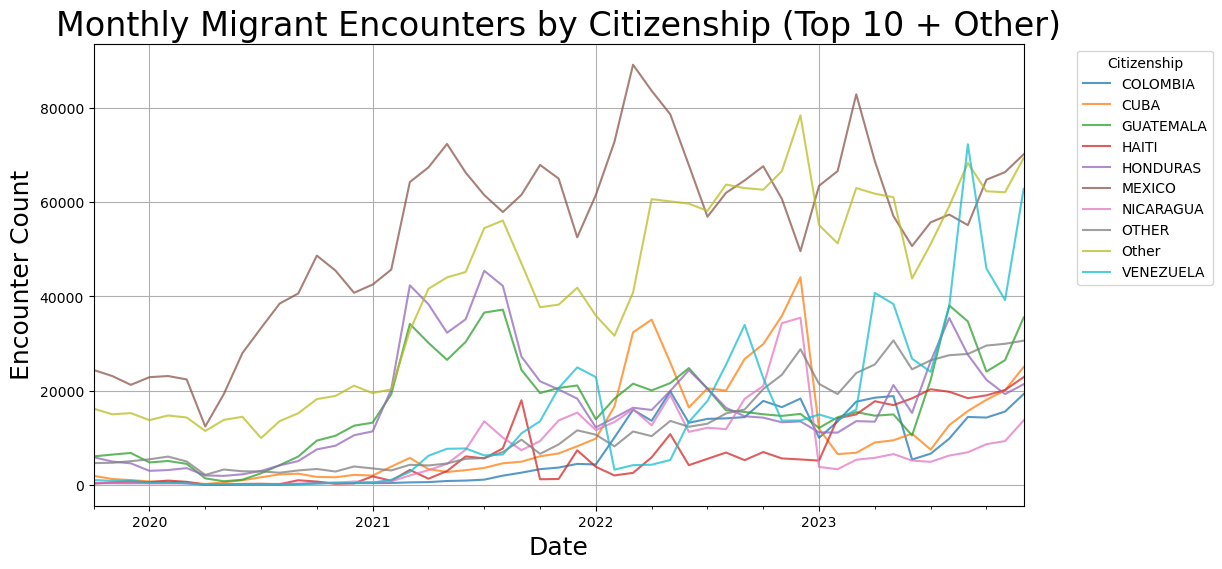

In [19]:
# Ensure 'Year-Date' is in datetime format
train_df['Year-Date'] = pd.to_datetime(train_df['Year-Date'])

# Filter data from October 2019 onwards
train_df = train_df[train_df['Year-Date'] >= '2019-10-01']

# Aggregate encounter counts by 'Citizenship'
total_encounters = train_df.groupby('Citizenship')['Encounter Count'].sum().reset_index()

# Identify the top 10 countries by total encounters
top_countries = total_encounters.nlargest(10, 'Encounter Count')['Citizenship'].tolist()

# Include 'Other' category
train_df['Citizenship'] = train_df['Citizenship'].apply(lambda x: x if x in top_countries else 'Other')

# Recalculate aggregated encounter counts
citizenship_monthly = train_df.groupby(['Year-Date', 'Citizenship'])['Encounter Count'].sum().reset_index()

# Pivot for plotting
pivot_df = citizenship_monthly.pivot(index='Year-Date', columns='Citizenship', values='Encounter Count')

# Plot the data
plt.figure(figsize=(12, 6))
pivot_df.plot(kind='line', figsize=(12, 6), alpha=0.75)
plt.title('Monthly Migrant Encounters by Citizenship (Top 10 + Other)', size=24)
plt.xlabel('Date', size=18)
plt.ylabel('Encounter Count', size=18)
plt.legend(title='Citizenship', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

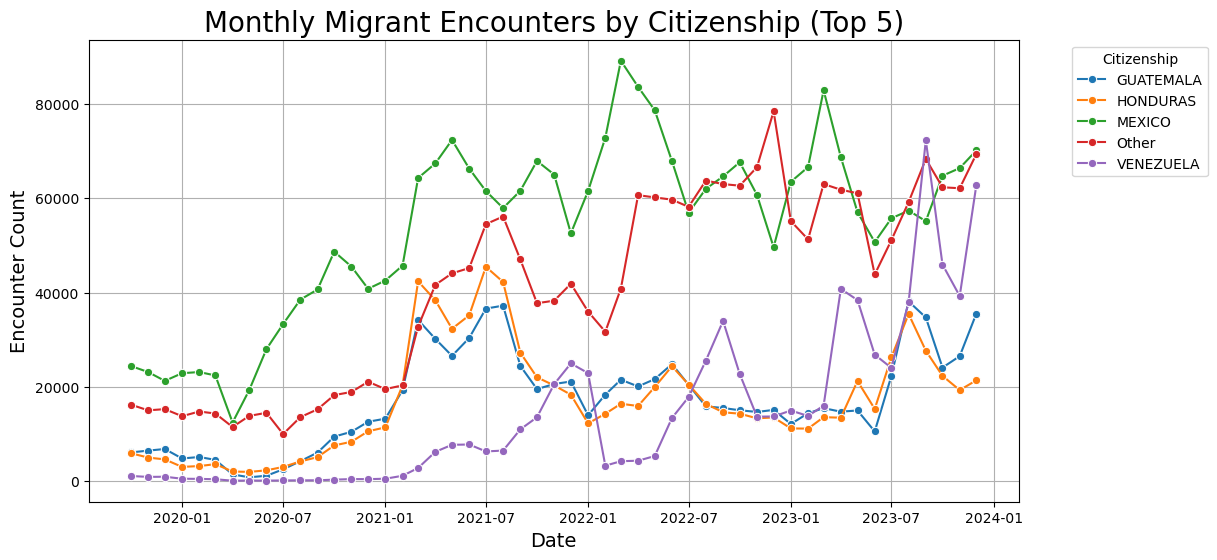

In [36]:
# Ensure 'Year-Date' is in datetime format
train_df['Year-Date'] = pd.to_datetime(train_df['Year-Date'])

# Aggregate encounter counts by month and Citizenship
monthly_citizenship_data = train_df.groupby([train_df['Year-Date'].dt.to_period('M'), 'Citizenship'])['Encounter Count'].sum().reset_index()
monthly_citizenship_data['Year-Date'] = monthly_citizenship_data['Year-Date'].dt.to_timestamp()

# Identify the top 5 countries by total encounters
top_countries = train_df.groupby('Citizenship')['Encounter Count'].sum().nlargest(5).index.tolist()

# Filter the dataset to only include the top 5 countries
monthly_citizenship_data = monthly_citizenship_data[monthly_citizenship_data['Citizenship'].isin(top_countries)]

# Plot the time series data
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_citizenship_data, x='Year-Date', y='Encounter Count', hue='Citizenship', marker='o')
plt.title('Monthly Migrant Encounters by Citizenship (Top 5)', size = 20)
plt.xlabel('Date', size = 14)
plt.ylabel('Encounter Count', size = 14)
plt.legend(title='Citizenship', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



Very interesting on the time series graph of migrations aggregated by the country of citizenship. Mexico was the typical country of origin before a sizable increase from Colombia, Guatemala, and Other in 2021, followed by an increase in 2022 by other countries such as Cuba and Honduras. 

## Decomposition

### Check assumptions using an ACF Plot

<Figure size 1000x500 with 0 Axes>

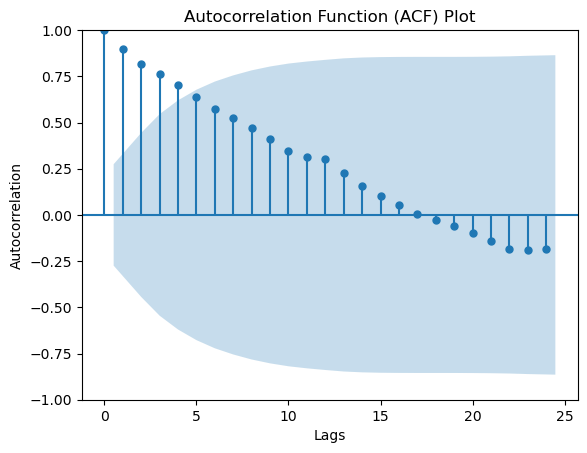

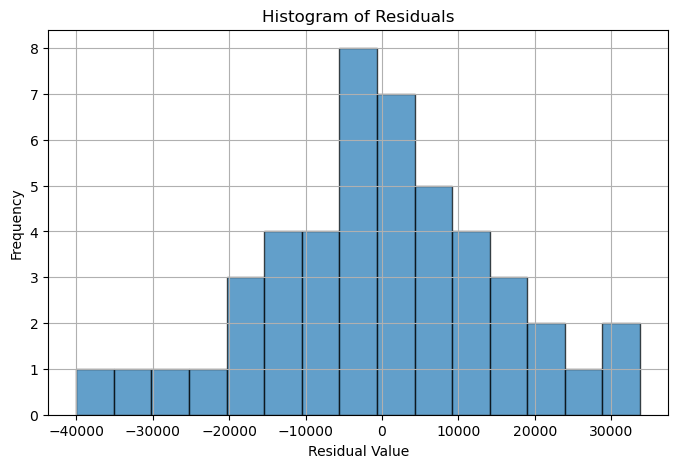

In [26]:
# Ensure 'Year-Date' is in datetime format
train_df['Year-Date'] = pd.to_datetime(train_df['Year-Date'])

# Aggregate encounter counts by month without any other aggregations
monthly_data = train_df.groupby(train_df['Year-Date'].dt.to_period('M'))['Encounter Count'].sum().reset_index()
monthly_data['Year-Date'] = monthly_data['Year-Date'].dt.to_timestamp()

# Perform additive decomposition
decomposition = seasonal_decompose(monthly_data['Encounter Count'], model='additive', period=4)

# Plot ACF
plt.figure(figsize=(10, 5))
sm.graphics.tsa.plot_acf(monthly_data['Encounter Count'], lags=24, alpha=0.05)
plt.title('Autocorrelation Function (ACF) Plot')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(8, 5))
plt.hist(decomposition.resid.dropna(), bins=15, edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

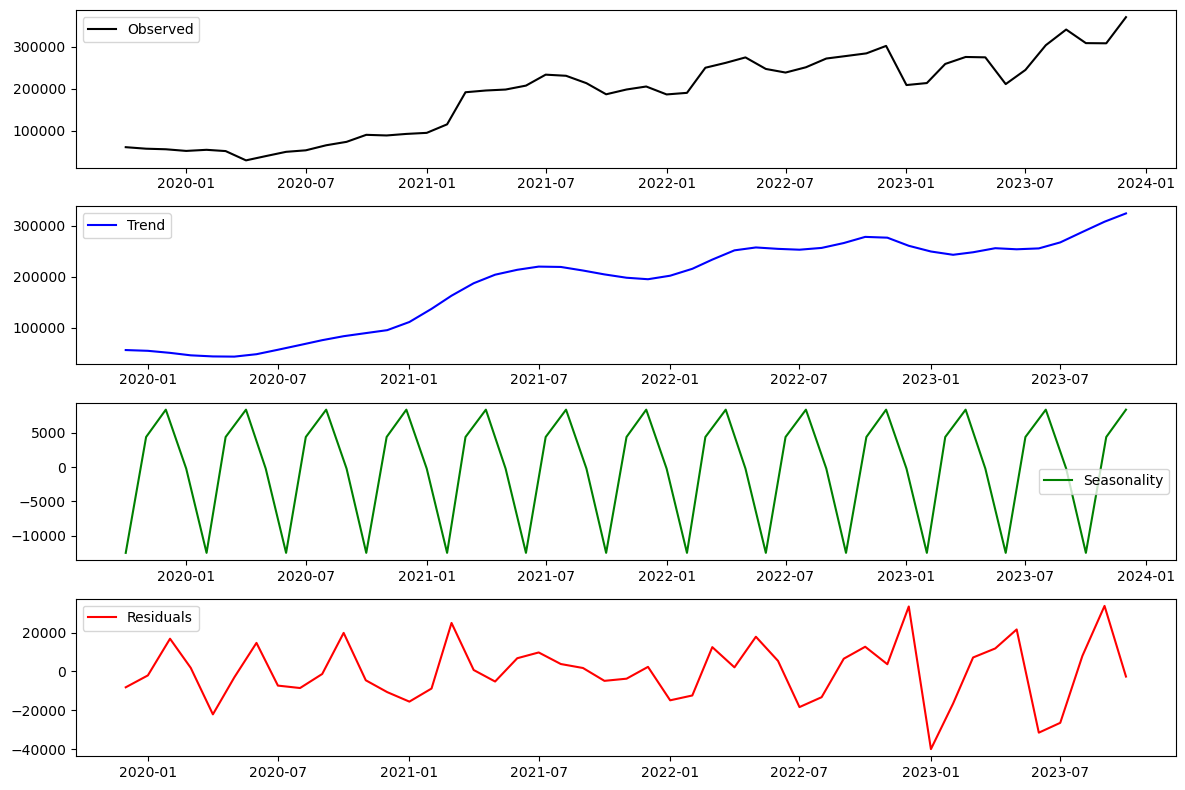

In [25]:
# Ensure 'Year-Date' is in datetime format
train_df['Year-Date'] = pd.to_datetime(train_df['Year-Date'])

# Aggregate encounter counts by month without any other aggregations
monthly_data = train_df.groupby(train_df['Year-Date'].dt.to_period('M'))['Encounter Count'].sum().reset_index()
monthly_data['Year-Date'] = monthly_data['Year-Date'].dt.to_timestamp()

# Perform additive decomposition
decomposition = seasonal_decompose(monthly_data['Encounter Count'], model='additive', period=4)

# Plot decomposition results
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(monthly_data['Year-Date'], decomposition.observed, label='Observed', color='black')
plt.legend()

plt.subplot(412)
plt.plot(monthly_data['Year-Date'], decomposition.trend, label='Trend', color='blue')
plt.legend()

plt.subplot(413)
plt.plot(monthly_data['Year-Date'], decomposition.seasonal, label='Seasonality', color='green')
plt.legend()

plt.subplot(414)
plt.plot(monthly_data['Year-Date'], decomposition.resid, label='Residuals', color='red')
plt.legend()

plt.tight_layout()
plt.show()


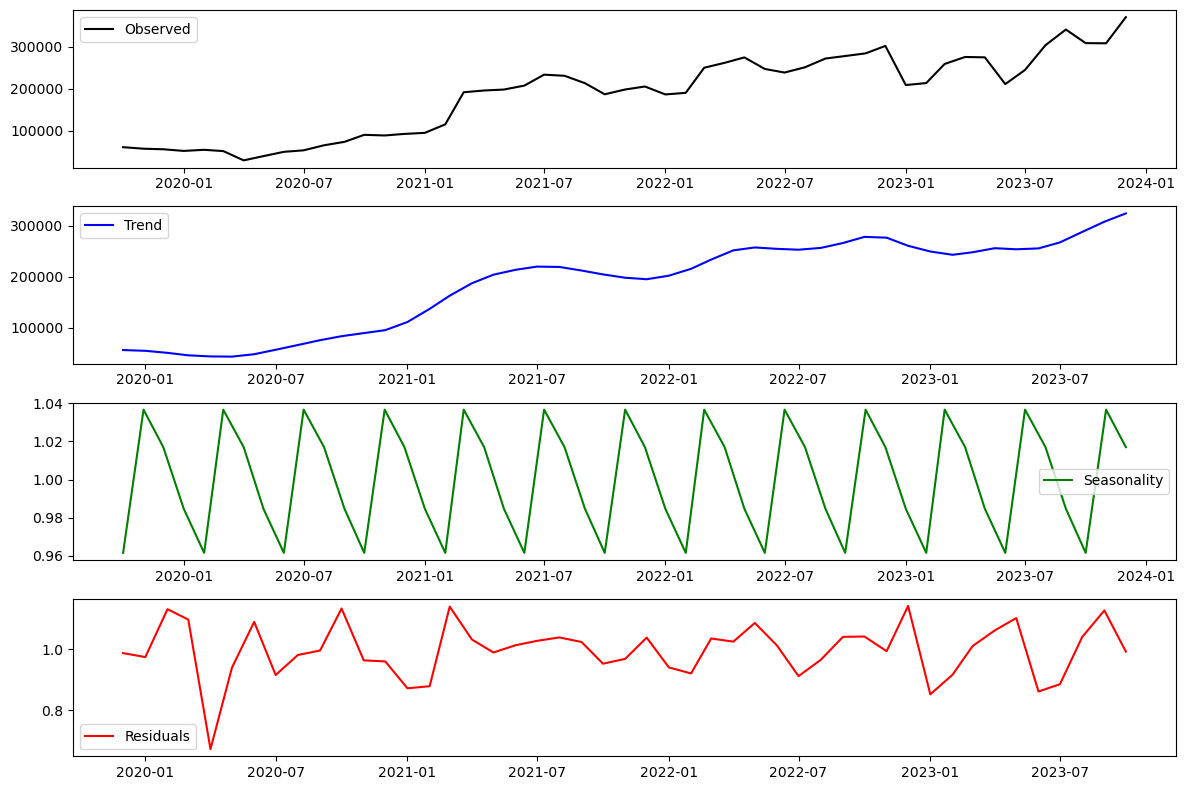

In [27]:
# Ensure 'Year-Date' is in datetime format
train_df['Year-Date'] = pd.to_datetime(train_df['Year-Date'])

# Aggregate encounter counts by month without any other aggregations
monthly_data = train_df.groupby(train_df['Year-Date'].dt.to_period('M'))['Encounter Count'].sum().reset_index()
monthly_data['Year-Date'] = monthly_data['Year-Date'].dt.to_timestamp()

# Perform additive decomposition
decomposition = seasonal_decompose(monthly_data['Encounter Count'], model='multiplicitive', period=4)

# Plot decomposition results
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(monthly_data['Year-Date'], decomposition.observed, label='Observed', color='black')
plt.legend()

plt.subplot(412)
plt.plot(monthly_data['Year-Date'], decomposition.trend, label='Trend', color='blue')
plt.legend()

plt.subplot(413)
plt.plot(monthly_data['Year-Date'], decomposition.seasonal, label='Seasonality', color='green')
plt.legend()

plt.subplot(414)
plt.plot(monthly_data['Year-Date'], decomposition.resid, label='Residuals', color='red')
plt.legend()

plt.tight_layout()
plt.show()


# Aggregated Data

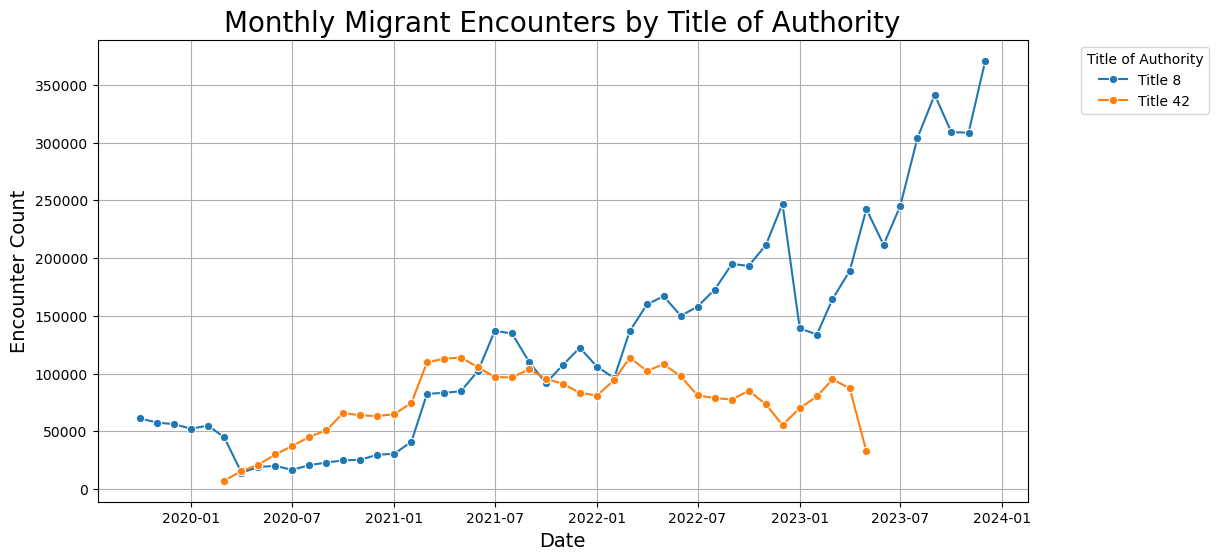

In [30]:
# Aggregate encounter counts by month and Title of Authority
monthly_authority_data = train_df.groupby([train_df['Year-Date'].dt.to_period('M'), 'Title of Authority'])['Encounter Count'].sum().reset_index()
monthly_authority_data['Year-Date'] = monthly_authority_data['Year-Date'].dt.to_timestamp()

# Plot the time series data
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_authority_data, x='Year-Date', y='Encounter Count', hue='Title of Authority', marker='o')
plt.title('Monthly Migrant Encounters by Title of Authority', size = 20)
plt.xlabel('Date', size = 14)
plt.ylabel('Encounter Count', size = 14)
plt.legend(title='Title of Authority', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()